# Objective
Demonstrate the SpotImage tool's basic functionalities to generate spot images with varied specs. 

Provide documentation and examples for the main methods:
 - `constructor`
 - `generate_spot_image()`
 
... as well as some helper methods:
 - `get_coord_snr_list_csv()`
 - `plot_coords()`
 - `plot_spot_nnd()`
 - `get_mean_spot_nnd()`

In [1]:
from SpotImage import SpotImage

# Instantiate a spot image

***Default parameters for the constructor (see table below for descriptions):***
- bg_img_path = None
- cmap = 'gray'
- img_sz = 300, 
- patch_sz = 11
- spot_shape_params = ['2D_Gauss', 1.75]
- global_intensity_dial = 0

***The constructor...***
- checks the validity of the following inputs:
    - bg_img_path
    - patch_sz
    - spot-shape_params
- converts the background image to an array
- calculates the threshold value for the valid (brighter) region using Otsu's method on the background image's intensity values
- gets a list of coordinates in the valid (brighter) region where spots may be placed
- gets a list of spot coordinates. All spot images generated from this instance will draw spot coordinates from this list. This allows for the fixing of spot location even as other parameters, such as SNR, vary.
- ***sets the following instance variables*** (in this order):

| Variable | Description |
|:------|:------|
|bg_img_path|the path to the background image|
|cmap|the color mapping|
|img_sz|the size of the image to be generated|
|patch_sz| a parameter of spot size and shape|
|spot_shape_params|a parameter of spot size and shape|
|margin|the minimum distance from spot center to image edge|
|bg_array|the image converted to a numpy array|
|threshold|the threshold intensity value between regions where spots may and may not be placed|
|global_intensity_dial|to add to the threshold value found by Otsu's method|
|valid_coords|the list of coordinates in the region where spots may be placed|
|total_coord_list|the total list of coordinates from which all images generated in one instance draw spot locations|

### Instantiate the SpotImage with default parameters, specifying only the background image filename.

In [2]:
si = SpotImage(bg_img_path='MAX_ISP_300_1.tif')

# Generate a spot image
Each call to generate_spot_image() takes in num_spots and snr_distr_params to generate a spot image, pulling spot locations from the list of spot locations generated by the constructor. 

*** Default parameters for generate_spot_image() (see table below for descriptions):***
- num_spots = None
- density = None
- snr_distr_params = ['Gauss', 10, 2]
- snr_threshold = 3
- plot_spots = False
- plot_img = False
- save_spots = False 
- save_img = False
- spots_filename = 'Spots'
- spot_img_filename = 'Spot Image'

***generate_spot_image() takes these steps to generate a spot image:***
1. Check that snr distribution params are valid
2. Set the spot image's list of coordinates
3. Populate the spot array and superimpose it over the background image array to get the spot image.
4. Plot and save the spot image and spot array as desired

More options for controlling nearest neighbor distance (NND) alongside density and number of spots later in this notebook.

***generate_spot_image() sets the following instance variables*** (in this order):

| Variable | Description |
|:------|:------|
|snr_distr_params|parameters descripting the SNR distribution|
|snr_threshold|the SNR value below which all values get bumped up to this value|
|num_spots| the number of spots in the generated spot image|
|density| the number of spots per pixel in the generated spot image|
|spot_list| the list of spots to arrange into a spot array|
|spot_array| the array of spots to superimpose over the background image|
|spot_image| the array of background image + the array of spots|

***generate_spot_image() modifies the following instance variables*** (in this order):

| Variable | When would it be modified? |
|:------|:------|
|global_intensity_dial| if the valid region needs to be adjusted to get a good ballpark number of spots|
|valid_coords|if the valid region needs to be adjusted to get a good ballpark number of spots|
|num_spots|if the valid region needs to be adjusted to get a good ballpark number of spots|
|density|if the valid region needs to be adjusted to get a good ballpark number of spots||
|coord_list|the list of coordinates in the spot image|


### Generate a spot image with default parameters, except num_spots, plot_spots, and plot_img.

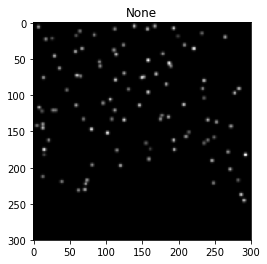

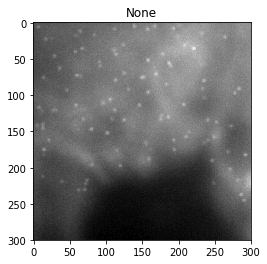

In [3]:
si.generate_spot_image(num_spots=100, plot_spots=True, plot_img=True)

#### Plot the coordinates of the most recently generated spot image.

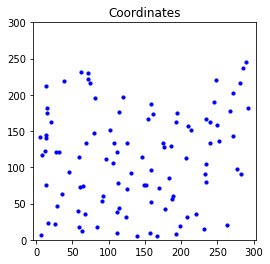

In [4]:
si.plot_coords()

#### Save the coordinates and SNR values of the most recently generated spot image.
Default parameters:
 - csv_filename = 'coords_snr.csv'

In [5]:
si.get_coord_snr_list_csv()

### Generate another spot image with the same spots but a different SNR distribution.
The same spots are present, but the spot images appear different because the assignment of SNR for each spot has changed.

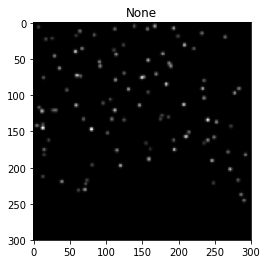

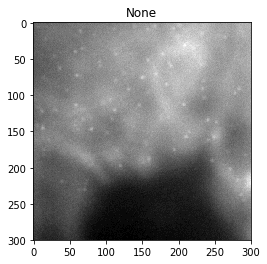

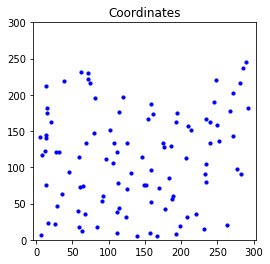

In [14]:
snr_mu = 5
snr_sigma = 2

si.generate_spot_image(snr_distr_params=['Gauss', snr_mu, snr_sigma], num_spots=100, plot_spots=True, plot_img=True)
si.plot_coords()

### Generate another spot image the same SNR distribution as previous, more spots.
The same spots are present, but more have been added.

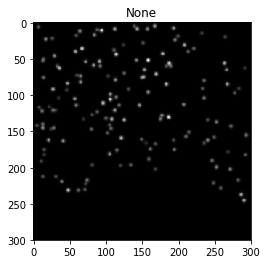

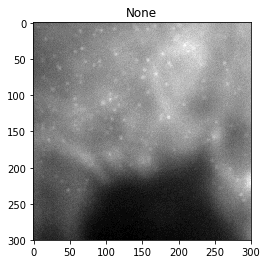

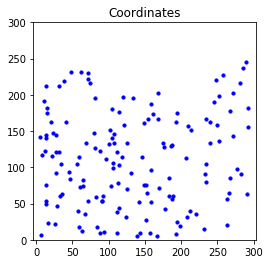

In [15]:
from SpotImage import SpotImage
si.generate_spot_image(snr_distr_params=['Gauss', snr_mu, snr_sigma], num_spots=150, plot_spots=True, plot_img=True)
si.plot_coords()

#### Get the mean nearest neighbor distance of each spot in the previous spot image

In [20]:
print(si.get_mean_spot_nnd())

10.780496463501382


#### Plot a histogram of the nearest neighbor distance of each spot in the previous spot image.

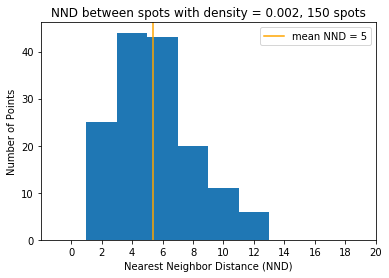

In [21]:
si.plot_spot_nnd()